## 0. Simulate phone dataset (*)
We want to simulate data  (𝑥,𝑦)  to represent cost for phone subscriptions, with:
* 𝑥  - called minutes per month
* 𝑦  - SEK per month
###  a) Use numpy.random.normal() to simulate a dataset with the following requirements:(*)
* #### set a seed to 42 (for reproducibility and reference)
* #### simulate 400 x-values from the r.v.  𝑋∼$ \mathscr{N} $(100,100) 
* #### take absolute value of these x-values
* #### simulate noise 400 noise values from r.v. 𝜖∼$ \mathscr{N} $(0,50) 
* #### Let  𝑦=2𝑥+25+𝜖 
* #### plot the data set

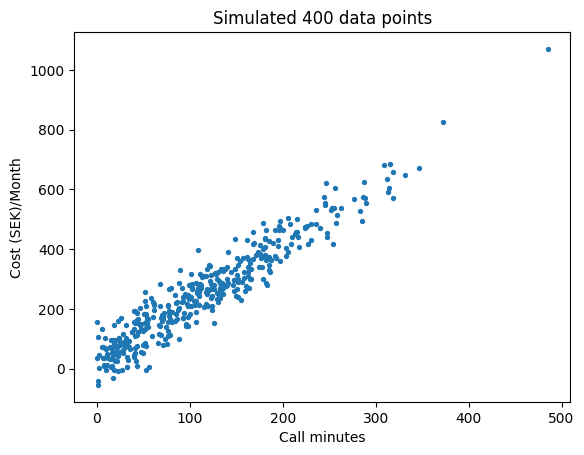

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

def simulate_x_values():
    x_values = np.abs(np.random.normal(100, 100, 400))  # mu 100, std 100, samples 400
    return x_values

def simulate_y_values(x):
    noise = np.random.normal(0, 50, len(x))  # loc is 0, scale is 50, len(x) är shape för outputen (1d array)
    y = 2*x + 25 + noise
    return y

x = simulate_x_values()
y = simulate_y_values(x)


plt.scatter(x, y, s=8)
plt.xlabel('Call minutes')
plt.ylabel('Cost (SEK)/Month')
plt.title('Simulated 400 data points')
plt.show()


#### b) Now we want to remove some outliers according to this assumption: (*)
* no one talks more than 300 min using this type of subscription
* no ones costs can be negative
* plot the new dataset
* also plot ground truth using the true parameters  𝛽0=25,𝛽1=2 

(400,) (400,)


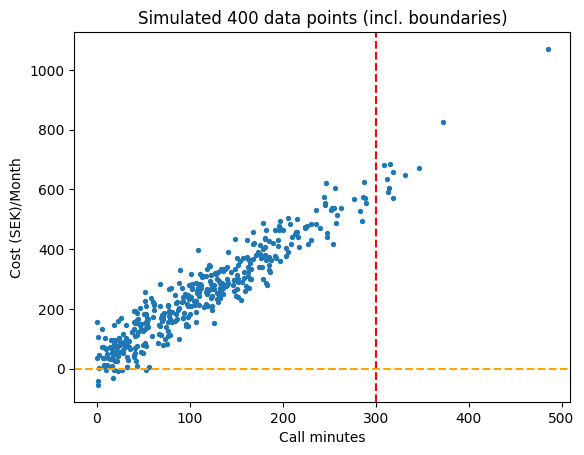

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

def simulate_x_values():
    x_values = np.abs(np.random.normal(100, 100, 400))  # mu 100, std 100, samples 400
    return x_values

def simulate_y_values(x):
    noise = np.random.normal(0, 50, len(x))  # loc is 0, scale is 50, len(x) är shape för outputen (1d array)
    y = 2*x + 25 + noise
    return y

print(y.shape, x.shape)


plt.scatter(x, y, s=8)
plt.axvline(x=300, color='red', linestyle="--")  # Boundaries for (talk < 300)
plt.axhline(y=0, color='orange', linestyle="--")
plt.xlabel('Call minutes')
plt.ylabel('Cost (SEK)/Month')
plt.title('Simulated 400 data points (incl. boundaries)')
plt.show()


(400,) (400,)


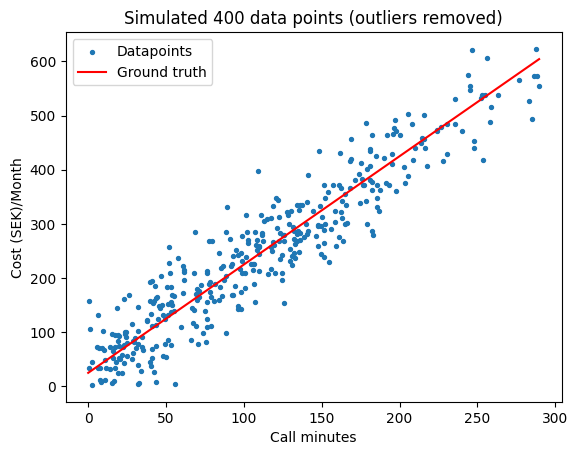

In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

x = np.abs(np.random.normal(100, 100, 400))  # mu 100, std 100, samples 400
noise = np.random.normal(0, scale=50, size=400)  # loc is 0, scale is 50
y = 2*x + 25 + noise

print(y.shape, x.shape)

mask = (x < 300) & (y > 0)
x, y= x[mask], y[mask]

# Plot dataset without outliers
plt.scatter(x, y, s=8, label='Datapoints')
plt.xlabel('Call minutes')
plt.ylabel('Cost (SEK)/Month')
plt.title('Simulated 400 data points (outliers removed)')

# Plot ground truth
ground_truth_x = np.linspace(0, np.max(x), 100)
ground_truth_y = 2*ground_truth_x + 25
plt.plot(ground_truth_x, ground_truth_y, color='r', label='Ground truth')
plt.legend()
plt.show()

### c) Insert the values into a DataFrame (*)

In [9]:
import pandas as pd

df = pd.DataFrame({'Minutes': x, 'Cost': y})

df.head(10)


,Minutes,Cost
0,149.671415,244.621448
1,86.173570,167.378389
2,164.768854,354.799893
3,252.302986,531.955001
4,76.584663,155.666051
5,76.586304,209.315105
6,257.921282,487.461542
7,176.743473,371.367972
8,53.052561,137.119904
9,154.256004,359.233950


### 1. Train|test split (*)
Before moving on with linear regression we shall first perform a train-test-split.
*  a) Create a train-test-split function with the following call signature: (*)

In [ ]:
# def train_test_split(X: pd.DataFrame, y: pd.DataFrame,
#     train_fraction=.7: float,
# random_state=42: int,
#     replace=False: bool) -> tuple

In [43]:
train_fraction = int(len(df)*0.7)  # Någon viss % t ex 0.7
print(train_fraction)

train = df.sample(n=train_fraction, random_state=42, replace=False) #  Hypergeometrisk fördelning??
train.head()

266


,Minutes,Cost
266,39.978312,192.570147
192,11.614256,34.734766
46,53.936123,151.202158
55,193.128012,371.612382
57,69.078762,111.395409


In [44]:
# vi vill droppa utifrån olika indices
test = df.drop(train.index)

# För att kontrollera att det stämmer det vi droppade
test.shape, train.shape

((115, 2), (266, 2))

In [39]:
import pandas as pd
import numpy as np

def train_test_split(df: pd.DataFrame, train_fraction: float = 0.7, random_state: int = 42, replace: bool = False) -> tuple:
    """
    Split a pandas DataFrame into a training set and a testing set.

    Parameters:
        df (pd.DataFrame): The pandas DataFrame to split.
        train_fraction (float): The fraction of the data to use for training (default is 0.7).
        random_state (int): The random seed to use for reproducibility (default is 42).
        replace (bool): Whether to sample with replacement (default is False).

    Returns:
        tuple: A tuple containing the training set and the testing set.
    """
    train_fraction = int(len(df) * train_fraction)
    train = df.sample(n=train_fraction, random_state=random_state, replace=replace)
    test = df.drop(train.index)
    return train, test

train, test = train_test_split(df)

print(train.shape)
print(test.shape)

(266, 2)
(115, 2)


In [42]:
test.info()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 1 to 380
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Minutes  115 non-null    float64
 1   Cost     115 non-null    float64
dtypes: float64(2)
memory usage: 2.7 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 266 entries, 266 to 332
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Minutes  266 non-null    float64
 1   Cost     266 non-null    float64
dtypes: float64(2)
memory usage: 6.2 KB


In [ ]:
import pandas as pd
import numpy as np

def train_test_split(X: pd.DataFrame, y: pd.DataFrame, train_fraction: float = 0.7, random_state: int = 42, replace: bool = False) -> tuple:
    """
    Split two pandas DataFrames X and y into a training set and a testing set.

    Parameters:
        X (pd.DataFrame): The input features.
        y (pd.DataFrame): The target variable.
        train_fraction (float): The fraction of the data to use for training (default is 0.7).
        random_state (int): The random seed to use for reproducibility (default is 42).
        replace (bool): Whether to sample with replacement (default is False).

    Returns:
        tuple: A tuple containing the training set and the testing set for X and y, respectively.
    """
    n = len(X)
    train_size = int(train_fraction * n)

    # Set random seed
    np.random.seed(random_state)

    # Get indices for train and test sets
    if replace:
        train_indices = np.random.choice(range(n), size=train_size, replace=True)
    else:
        shuffled_indices = np.random.permutation(range(n))
        train_indices = shuffled_indices[:train_size]
    
    test_indices = [i for i in range(n) if i not in train_indices]

    # Split data into train and test sets
    X_train, y_train = X.iloc[train_indices], y.iloc[train_indices]
    X_test, y_test = X.iloc[test_indices], y.iloc[test_indices]

    return X_train, X_test, y_train, y_test
